In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
telco_df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
telco_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
telco_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
#customer Churn counts
telco_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
#Demograhies columns are 'gender','SeniorCitizen', 'Partner' and 'Dependents'
df1=telco_df.groupby(['gender','SeniorCitizen', 'Partner', 'Dependents','Churn'])['Churn'].count().unstack().head(30)
df1

Churn                                     No  Yes
gender SeniorCitizen Partner Dependents          
Female 0             No      No          909  429
                             Yes         110   32
                     Yes     No          482  114
                             Yes         720  124
       1             No      No          159  158
                             Yes           2    1
                     Yes     No          136   73
                             Yes          31    8
Male   0             No      No          963  418
                             Yes         168   43
                     Yes     No          439  128
                             Yes         717  105
       1             No      No          126  118
                             Yes           4    1
                     Yes     No          176  105
                             Yes          32   12

1.a) 2 Popular demograhies are those with highest Churn_No which are:
    - Male non-senior citizen with no patner and no dependents
    - Female non-senior citizen with no patner and no dependents
    

1.b) Marketing should Female Non-Senior citizen with no patner and no dependent

**2. Services**

2.a) 3 services contributing to a higher monthly charge and resulting to customers churning

In [9]:
services=['PhoneService', 'MultipleLines', 'InternetService',
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
     'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
      'PaymentMethod']


services_df=telco_df[['PhoneService', 'MultipleLines', 'InternetService',
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
     'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
      'PaymentMethod','MonthlyCharges','Churn']]
services_df.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,Yes
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,No
4,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,Yes


In [3]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(20, 20))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

for i in range(len(services)):
    sns.boxplot(x = services[i],y="MonthlyCharges", hue="Churn", data=services_df, ax=ax[i])

NameError: name 'plt' is not defined

Answer: the top 3 services with a more high monthly charges  with Yes Churn as per the boxplots are:
    - Online Security
    - TechSupport
    -Device Protection

2.b) If the telco was to offer Phone as a standalone service, which type of contract
would encourage customer retention?

In [11]:
phone_service_df=telco_df.groupby(['PhoneService','Contract','Churn'])['Churn'].count().unstack()
phone_service_df

Churn                          No   Yes
PhoneService Contract                  
No           Month-to-month   223   153
             One year         131    14
             Two year         158     3
Yes          Month-to-month  1997  1502
             One year        1176   152
             Two year        1489    45

Answer: A Two year Contract would encourage customer retention since it is the lowest Churning for the phone service

3.a) Payment bouquet packages

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

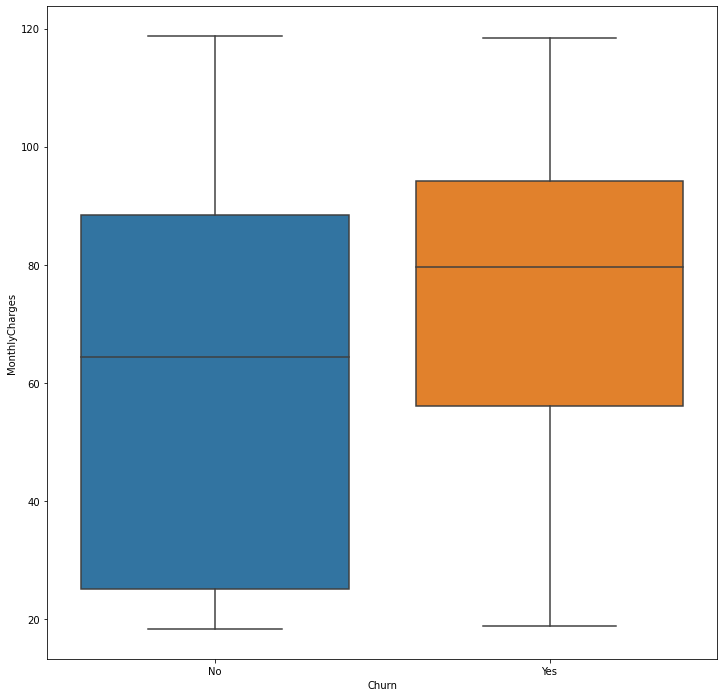

In [14]:
   
f, ax = plt.subplots(figsize=(12, 12))

sns.boxplot(x = 'Churn', y = telco_df['MonthlyCharges'], data=telco_df)

In [15]:
df3=telco_df.groupby(['MonthlyCharges','Churn'])['Churn'].count().unstack()

<AxesSubplot:xlabel='MonthlyCharges'>

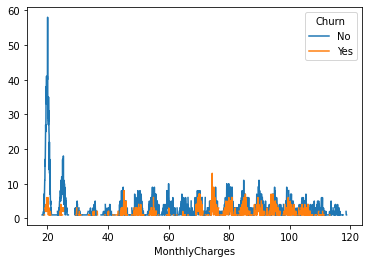

In [16]:
df3.plot()

Answer: based on the boxplot showing the Churn_No,
        Basic - 25.00
        Plus - 63.00
        Premium - 85.00

3.b) Payment - paperless billing

In [17]:
df4=telco_df.groupby(['PaperlessBilling','Churn'])['Churn'].count().unstack()
df4

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


<AxesSubplot:xlabel='PaperlessBilling'>

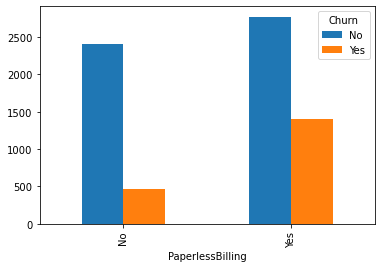

In [18]:
df4.plot.bar()

In [19]:
#Percentage of customers leaving for No Paperless Billing
perc_churn_for_no_paperless = 469/(469+2403)*100
print('Percentage of customers leaving for No Paperless Billing = ',perc_churn_for_no_paperless,'%')

#Percentage of customers leaving for Paperless Billing
perc_churn_for_paperless = 1400/(1400+2771)*100
print('Percentage of customers leaving for Paperless Billing = ',perc_churn_for_paperless,'%')

Percentage of customers leaving for No Paperless Billing =  16.33008356545961 %
Percentage of customers leaving for Paperless Billing =  33.565092304003834 %


Answer:
    A larger percentage of customers are leaving as a result of paperless billing, so the company should NOT strictly go 
    paperless for their monthly billings as a technique of keeping their customers